### DSP Project on Recommendation System for Rating a Products 

##### Amazon Dataset: https://nijianmo.github.io/amazon/index.html#code

In [1]:
# import the libraries

In [2]:
import numpy as np

import pandas as pd

In [3]:
import json

In [4]:
data = []

with open('Kindle_Store_5.json') as f:
    
    for line in f:
        
        json_data = json.loads(line)
        
        data.append(json_data)
    

In [5]:
df1 = pd.DataFrame(data)

In [6]:
# Extract 10% of the df to allow fast loading

df = df1.sample(frac = 0.1, random_state = 42)

# Resetting the index of the 10% sample DataFrame

df.reset_index(drop = True, inplace = True)

In [7]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"12 13, 2013",A30SHRDUQFXF6V,B00FPZ53PW,{'Format:': ' Kindle Edition'},Steve Bureau,"Wow, there is a ton of content there! 52 pages...",A lot of content,1386892800,NaN,NaN
1,5.0,True,"10 8, 2016",A3OCKJ3WL1IVRI,B01H2XPLB0,{'Format:': ' Kindle Edition'},ckc,Ah here we go again. New season New characters...,The Wifey'$ are back,1475884800,NaN,NaN
2,5.0,False,"08 17, 2015",A3DVTU6BUBAC6,B00XVC88VC,{'Format:': ' Kindle Edition'},Jaime,"My god! Conscience, the 2nd installment in Cec...",FANTASTIC 2nd installment!!!!!,1439769600,6,NaN
3,5.0,True,"05 27, 2015",A175GM0AGKEBBF,B00UZKS8V8,{'Format:': ' Kindle Edition'},Teresa M Palombi,"OMG, I wanted more",Five Stars,1432684800,NaN,NaN
4,5.0,True,"03 10, 2015",AHPYP1RPIJ7TU,B00O6KVFC2,{'Format:': ' Kindle Edition'},randy atkins,Good read all the way throughout,Five Stars,1425945600,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222298 entries, 0 to 222297
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         222298 non-null  float64
 1   verified        222298 non-null  bool   
 2   reviewTime      222298 non-null  object 
 3   reviewerID      222298 non-null  object 
 4   asin            222298 non-null  object 
 5   style           217230 non-null  object 
 6   reviewerName    222275 non-null  object 
 7   reviewText      222264 non-null  object 
 8   summary         222143 non-null  object 
 9   unixReviewTime  222298 non-null  int64  
 10  vote            29009 non-null   object 
 11  image           128 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 18.9+ MB


In [9]:
import seaborn as sns

<Axes: xlabel='overall', ylabel='count'>

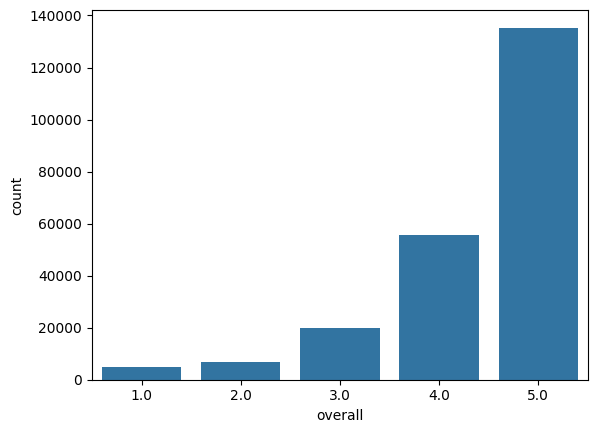

In [10]:
sns.countplot(x = 'overall', data = df)

In [11]:
import matplotlib.pyplot as plt

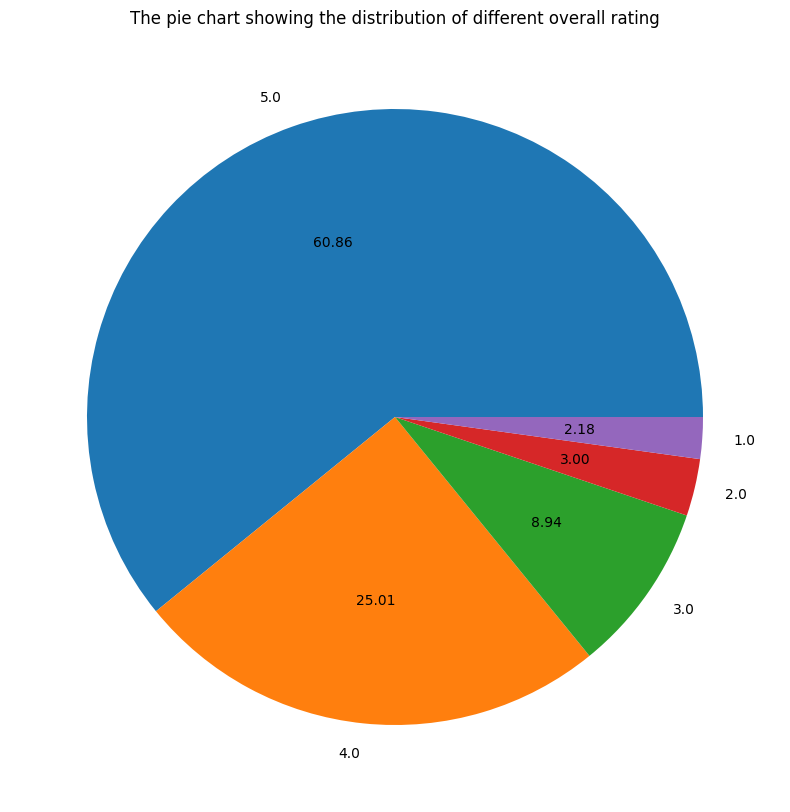

In [12]:
fig = plt.figure(figsize = (10,10))

tags = df['overall'].value_counts()

tags.plot(kind = 'pie', autopct = '%1.2f', label = '')

plt.title('The pie chart showing the distribution of different overall rating')

plt.show()

In [13]:
df['asin'].value_counts()

asin
B00YN6XHMU    231
B00C2WDD5I    137
B00ESJ3S94    135
B015BIHKH6    118
B0142IHZPI     84
             ... 
B00T27QCHW      1
B00BL8F0PU      1
B00HMQ7H9W      1
B00LVI0X0M      1
B00UD9JMBQ      1
Name: count, Length: 70321, dtype: int64

<Axes: xlabel='verified', ylabel='count'>

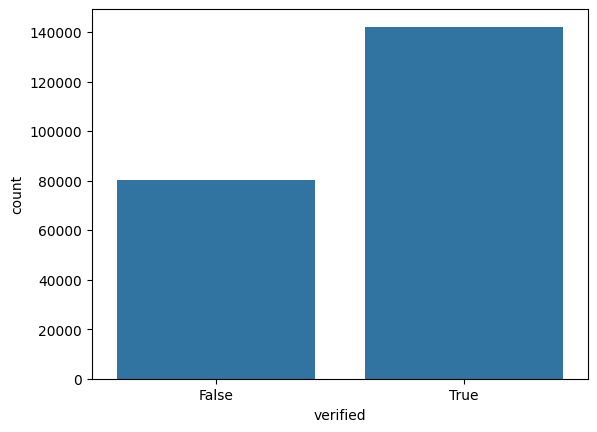

In [14]:
sns.countplot(x = 'verified', data = df)

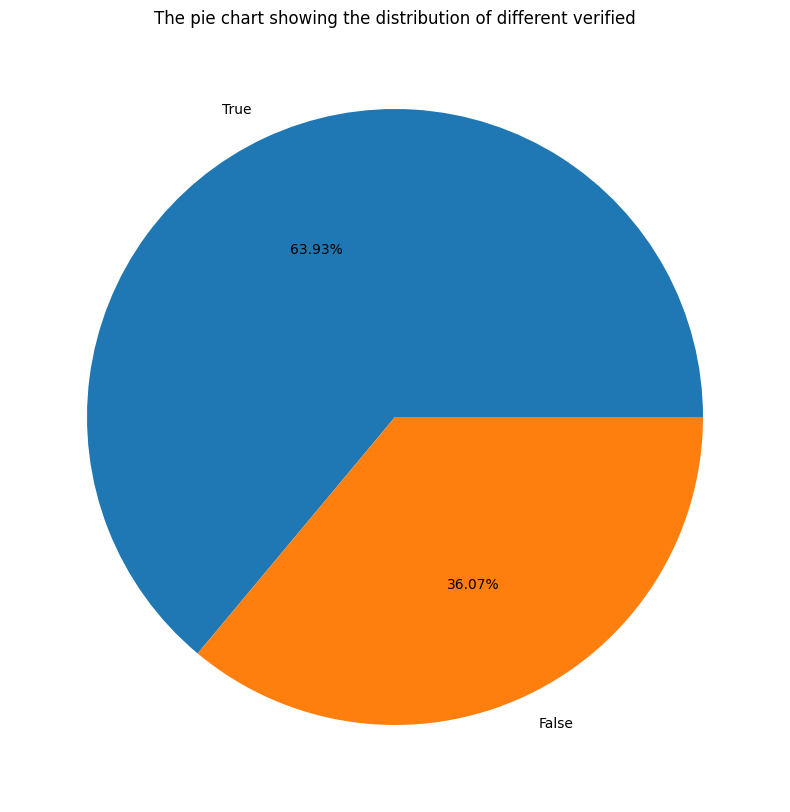

In [15]:
fig = plt.figure(figsize = (10,10))

tags = df['verified'].value_counts()

tags.plot(kind = 'pie', autopct = '%1.2f%%', label = '')

plt.title('The pie chart showing the distribution of different verified')

plt.show()

In [16]:
# The rating sentimental analysis

### interested columns: `reviewText and overall`

In [17]:
data_df = df[['reviewText','overall']]

data_df.head()

,reviewText,overall
0,"Wow, there is a ton of content there! 52 pages...",4.0
1,Ah here we go again. New season New characters...,5.0
2,"My god! Conscience, the 2nd installment in Cec...",5.0
3,"OMG, I wanted more",5.0
4,Good read all the way throughout,5.0


In [18]:
data_df.sample(5)

,reviewText,overall
19569,I had never read any of their books until now....,5.0
105469,This was a sweet and sexy Christmas read. The...,5.0
127002,A good story but a rough read. I kept backread...,3.0
214038,very interesting to fine out how the parents o...,5.0
92190,Another fantastic story to add to the Black Hi...,5.0


In [19]:
data_df['overall'].value_counts()

overall
5.0    135293
4.0     55604
3.0     19882
2.0      6662
1.0      4857
Name: count, dtype: int64

In [20]:
# preprocessing

dependencies for requirements.txt

- pip install spacy==2.2.3

- pip install beautifulsoup4==4.9.1

- pip install textblob==0.15.3

- pip install unidecode

- scikit-learn==

- re

In [21]:
from bs4 import BeautifulSoup

from unidecode import unidecode

import re

def clean_text(text):
    
    text = str(text).lower().replace('\\', '').replace('_', ' ')
    #text = contractions.fix(text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = unidecode(text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub("(.)\\1{2,}", "\\1", text)
                        
    return text

In [22]:

data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))



/Users/nguyenvietthai/miniconda3/envs/dsp-project/lib/python3.9/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/var/folders/_s/ykdy6cd56w92znrywxw_lpj80000gn/T/ipykernel_21128/440764262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))


In [23]:
data_df.head()

,reviewText,overall
0,wow there is a ton of content there 52 pages i...,4.0
1,ah here we go again new season new characters ...,5.0
2,my god conscience the 2nd installment in cecil...,5.0
3,omg i wanted more,5.0
4,good read all the way throughout,5.0


In [24]:
# implementing the algorithm

In [25]:
# TFIDF and Linear SVM

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

In [27]:
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,3), analyzer = 'char')

            # ngram = 1,5

In [28]:
tfidf.fit(data_df['reviewText'])

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

In [29]:
# selecting the features and target

X = tfidf.transform(data_df['reviewText'])

In [30]:
y = data_df['overall']

In [31]:
X.shape, y.shape

((222298, 20576), (222298,))

In [32]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)



In [33]:
X_train.shape

(166723, 20576)

In [34]:
# Model fitting using LinearSVC

In [35]:
LinSVC = LinearSVC(C = 20, class_weight = 'balanced')   # C = 10, 20, # class_weight ='balanced'

In [36]:
LinSVC.fit(X_train, y_train)

/Users/nguyenvietthai/miniconda3/envs/dsp-project/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nguyenvietthai/miniconda3/envs/dsp-project/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20, class_weight='balanced')

In [37]:
y_predicted = LinSVC.predict(X_test)

y_predicted

array([5., 3., 5., ..., 5., 5., 3.])

In [38]:
# classification report for model performance

In [39]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         1.0       0.27      0.43      0.33      1224
         2.0       0.19      0.33      0.24      1664
         3.0       0.34      0.44      0.38      5001
         4.0       0.46      0.34      0.39     13913
         5.0       0.79      0.79      0.79     33773

    accuracy                           0.63     55575
   macro avg       0.41      0.47      0.43     55575
weighted avg       0.64      0.63      0.63     55575



In [40]:
# Using the RandomForest Algorithm

In [41]:
#from sklearn.ensemble import RandomForestClassifier

In [42]:
# Initialize the random forest classifier

#rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the classifier on the training data

#rf_classifier.fit(X_train, y_train)


In [43]:
# Predict the labels on the test set

#y_predicted_rf = rf_classifier.predict(X_test)

#y_predicted_rf

In [44]:
# End_of_Model_Training

In [45]:
# to test

In [46]:
# text_entry = input('Please provide your reviews: ')

text_entry = "This product is really really bad. I don't like it at all!"

text_entry = clean_text(text_entry)

text_transformed = tfidf.transform([text_entry])


print('\nThe predicted overall rating is: ', LinSVC.predict(text_transformed))


The predicted overall rating is:  [1.]


In [47]:
# loading model to pickle

In [48]:
import pickle

In [49]:
with open('dsp_project_model.pkl', 'wb') as file:
    pickle.dump(LinSVC, file)

In [50]:
# Save the fitted TF-IDF vectorizer to a pickle file
with open("dsp_tfidf.pkl", "wb") as file:
    pickle.dump(tfidf, file)

In [51]:
# reading the pickle file

In [52]:
#import pickle

In [53]:
#with open('dsp_project_model.pkl', 'rb') as file:
    #clf = pickle.load(file)

In [54]:
# predict with it

In [55]:
#predictions = clf.predict([['this product is good']])

In [56]:
#predictions